In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
IMG_PATH = 'images/'
cv2.__version__

'4.1.1'

In [2]:
def open_image(img, name): 
    cv2.imshow(name, img) 
    cv2.waitKey(0)
    
def show_image(img, title = 'original'):
    plt.title(title)
    plt.imshow(img, cmap="gray", vmin=0, vmax=255)

### Simple thresholding + contours

<class 'numpy.ndarray'>


((250, 482, 3), None)

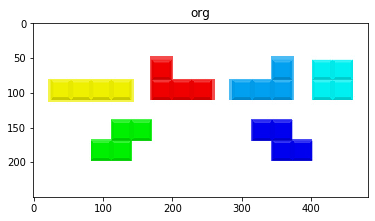

In [3]:
img = cv2.imread(IMG_PATH + "tetris_blocks.png")
print(type(img))
img.shape, show_image(img, 'org')

- All pixels > 225 are set to 0 (black) which corresponds to the background of the image
- Then set pixel values < 225 to 255 (white) which corresponds to the foreground of the image (i.e. Tetris blocks)

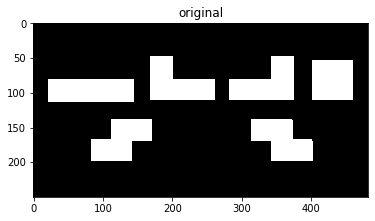

In [4]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray_img, 225, 255, cv2.THRESH_BINARY_INV)[1]
show_image(thresh)

6


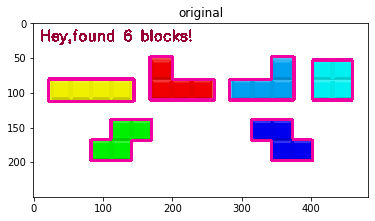

In [5]:
# find contours (i.e.outlines) of the foreground objects in the
cnts, h = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)
output = img.copy()
print(len(cnts))

for c in cnts:
    cv2.drawContours(output, [c], -1, (240, 0, 159), 3)
    
text = "Hey,found {} blocks!".format(len(cnts))
cv2.putText(output, text, (10, 25),  
            cv2.FONT_HERSHEY_SIMPLEX, 0.7,
            (150, 0, 50), 2)
show_image(output)

### Adaptive thresholding + dilate + erode

<class 'numpy.ndarray'>


((458, 610, 3), None)

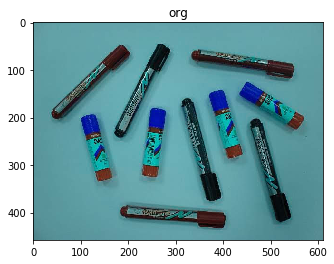

In [6]:
img = cv2.imread(IMG_PATH + "objects.jpg")
print(type(img))
img.shape, show_image(img, 'org')

- The image here contains small objects, and some have the same pixels values (light blue) with the background. This aspect can cause the egdes detecting problem & image contrast adjustment should be used to prevent this. (histogram equlization, linear transformation, non-linear transformation ex of gamma correction , Piecewise-linear transformation …etc )

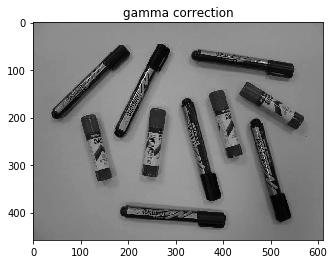

In [7]:
# Convert image in grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Contrast adjusting with gamma correction y = 1.2
gray_correct = np.array(255 * (gray_img / 255) ** 1.2 , dtype='uint8')
show_image(gray_correct, 'gamma correction')

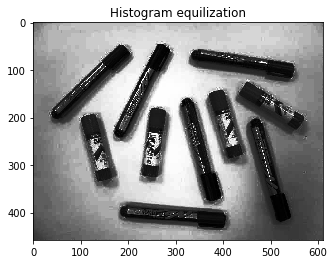

In [8]:
# histogramm equalization
gray_equ = cv2.equalizeHist(gray_img)
show_image(gray_equ, 'Histogram equilization')

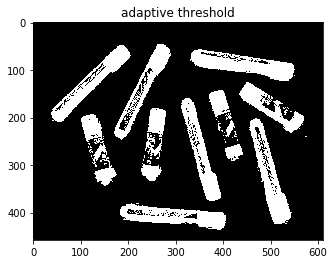

In [9]:
# Local adaptative threshold
thresh = cv2.adaptiveThreshold(gray_correct, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY, 255, 9)
thresh = cv2.bitwise_not(thresh)
show_image(thresh, 'adaptive threshold')

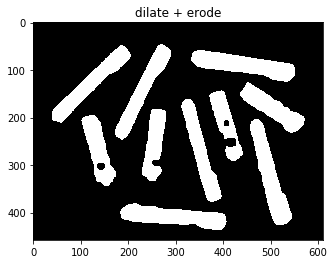

In [10]:
# Dilatation et erosion
kernel = np.ones((12,12), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
img_erode = cv2.erode(img_dilation,kernel, iterations=1)
# clean all noise after dilatation and erosion
img_erode = cv2.medianBlur(img_erode, 7)
show_image(img_erode, 'dilate + erode')

no.of objects in image: 10


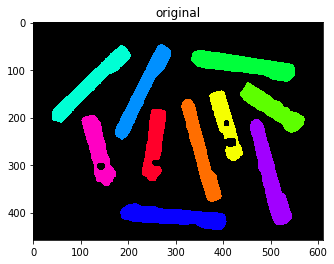

In [11]:
# Labeling
ret, labels = cv2.connectedComponents(img_erode)
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0
show_image(labeled_img)
print('no.of objects in image:', ret-1)